<a href="https://colab.research.google.com/github/yankikalfa/MGTF-405-Business-Forecasting/blob/main/Lecture_4_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Data & Transformations

In [1]:
! pip install statsmodels -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

Mounted at /content/drive/


In [3]:
df = pd.read_excel('/content/drive/MyDrive/MGTF 405/CPILFESL.xlsx',index_col=0,parse_dates=True)

In [4]:
df['cpi_mom'] = np.log(df['CPILFESL']).diff()*12
df['cpi_yoy'] = np.log(df['CPILFESL']).diff(12)

# Data Visualization

Text(0.5, 1.0, 'Core CPI Index')

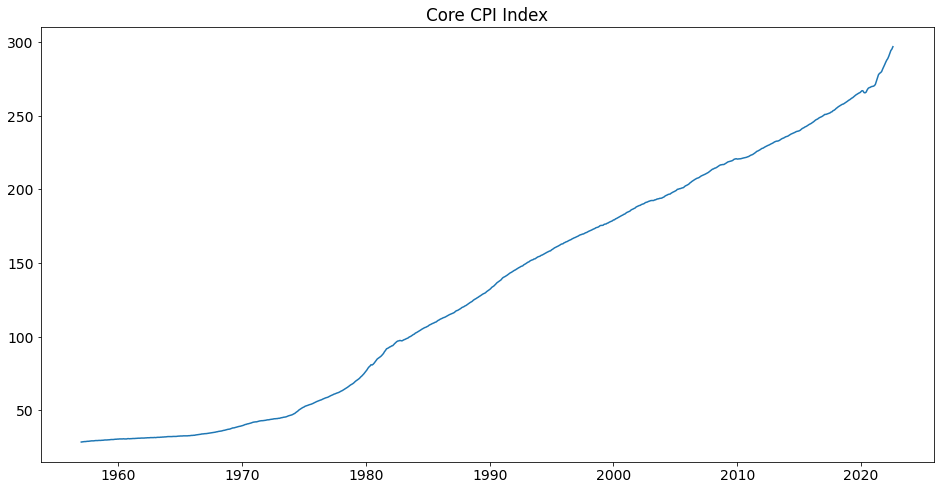

In [5]:
plt.plot(df['CPILFESL'])
plt.title('Core CPI Index')

Text(0.5, 1.0, 'Core Inflation Month on Month Annualized')

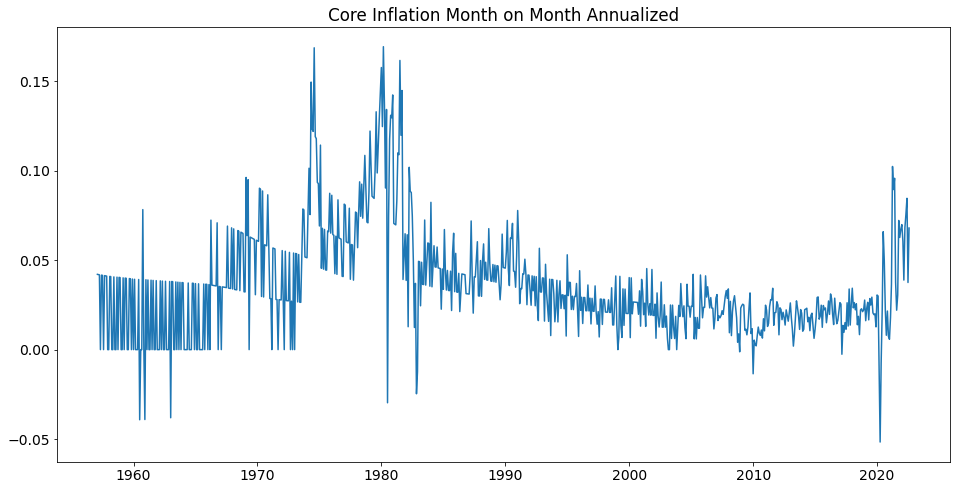

In [6]:
plt.plot(df['cpi_mom'])
plt.title('Core Inflation Month on Month Annualized')

Text(0.5, 1.0, 'Core Inflation Year on Year')

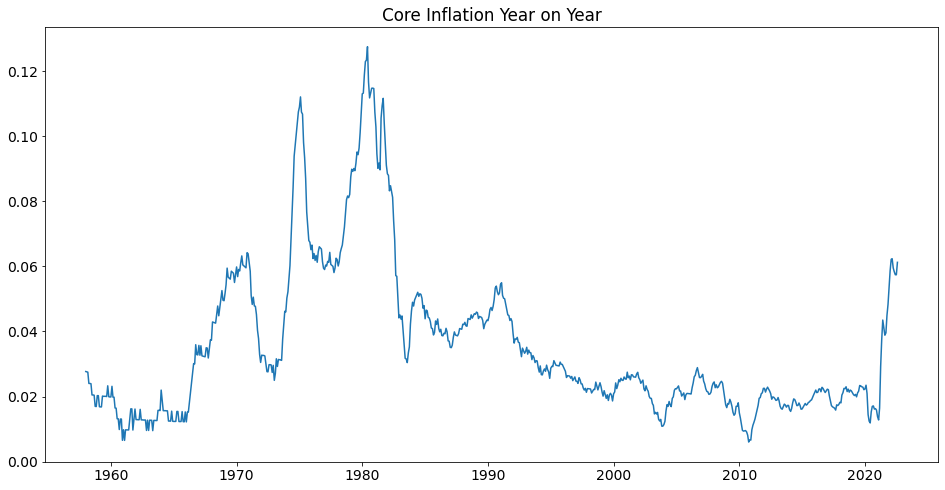

In [7]:
plt.plot(df['cpi_yoy'])
plt.title('Core Inflation Year on Year')

# State Space Model

## AR(1) In State Space Form

In [8]:
df.dropna(inplace=True)

In [9]:
mom_train=df.iloc[:-12,1]
mom_test=df.iloc[-12:,1]
yoy_train=df.iloc[:-12,2]
yoy_test=df.iloc[-12:,2]


In [10]:
mom_model=SARIMAX(mom_train, trend='c',order=(1,0,0)).fit()
yoy_model=SARIMAX(yoy_train, trend='c',order=(1,0,0)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
mom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                cpi_mom   No. Observations:                  764
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1816.456
Date:                Thu, 13 Oct 2022   AIC                          -3626.913
Time:                        15:28:01   BIC                          -3612.997
Sample:                    01-01-1958   HQIC                         -3621.556
                         - 08-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0121      0.001      9.552      0.000       0.010       0.015
ar.L1          0.6576      0.019     34.396      0.000       0.620       0.695
sigma2         0.0005   1.72e-05     29.260      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                  51.87   Jarque-Bera (JB):               244.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
yoy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                cpi_yoy   No. Observations:                  764
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3504.940
Date:                Thu, 13 Oct 2022   AIC                          -7003.880
Time:                        15:28:01   BIC                          -6989.964
Sample:                    01-01-1958   HQIC                         -6998.522
                         - 08-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.055      0.292      -0.000       0.001
ar.L1          0.9946      0.003    384.100      0.000       0.990       1.000
sigma2      6.001e-06   1.62e-07     37.092      0.000    5.68e-06    6.32e-06
===================================================================================
Ljung-Box (L1) (Q):                  61.34   Jarque-Bera (JB):               918.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
mom_fit=pd.DataFrame(mom_model.predict()).reset_index()
yoy_fit=pd.DataFrame(yoy_model.predict()).reset_index()

train_mom_fitted=pd.concat([mom_train.reset_index(), mom_fit], axis=1)
train_mom_fitted.index= pd.to_datetime(mom_train.reset_index()['date'], format='%Y-%m-%d', errors='coerce')

train_yoy_fitted=pd.concat([yoy_train.reset_index(), yoy_fit], axis=1)
train_yoy_fitted.index= pd.to_datetime(yoy_train.reset_index()['date'], format='%Y-%m-%d', errors='coerce')

train_mom_fitted.drop(['date','index'],axis=1,inplace=True)
train_yoy_fitted.drop(['date','index'],axis=1,inplace=True)



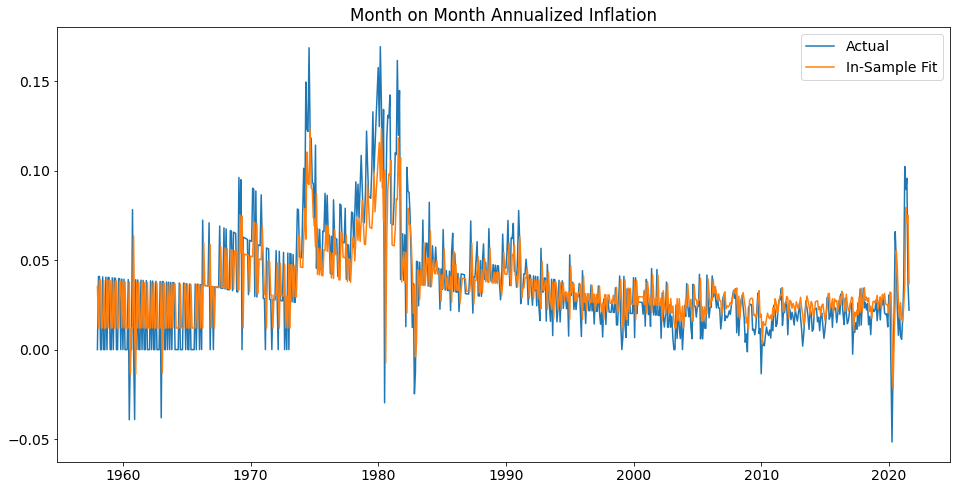

In [14]:
plt.plot(train_mom_fitted['cpi_mom'],label='Actual')
plt.plot(train_mom_fitted['predicted_mean'],label='In-Sample Fit')
plt.title('Month on Month Annualized Inflation')
plt.legend()


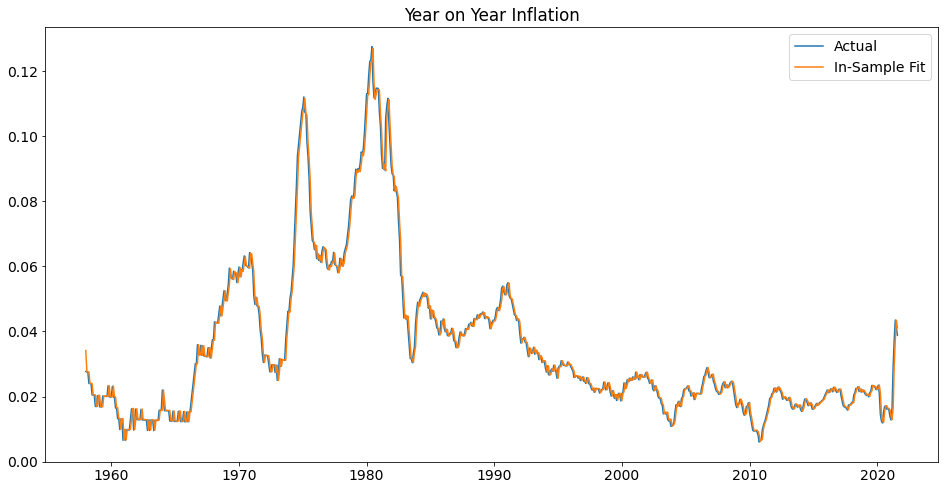

In [15]:
plt.plot(train_yoy_fitted['cpi_yoy'],label='Actual')
plt.plot(train_yoy_fitted['predicted_mean'],label='In-Sample Fit')
plt.title('Year on Year Inflation')
plt.legend()

In [16]:
mom_forecasts=mom_model.forecast(12)
mom_forecasts.index=pd.to_datetime(mom_test.reset_index()['date'])

yoy_forecasts=yoy_model.forecast(12)
yoy_forecasts.index=pd.to_datetime(yoy_test.reset_index()['date'])

mom_test =pd.concat([mom_test, mom_forecasts], axis=1)
yoy_test =pd.concat([yoy_test, yoy_forecasts], axis=1)


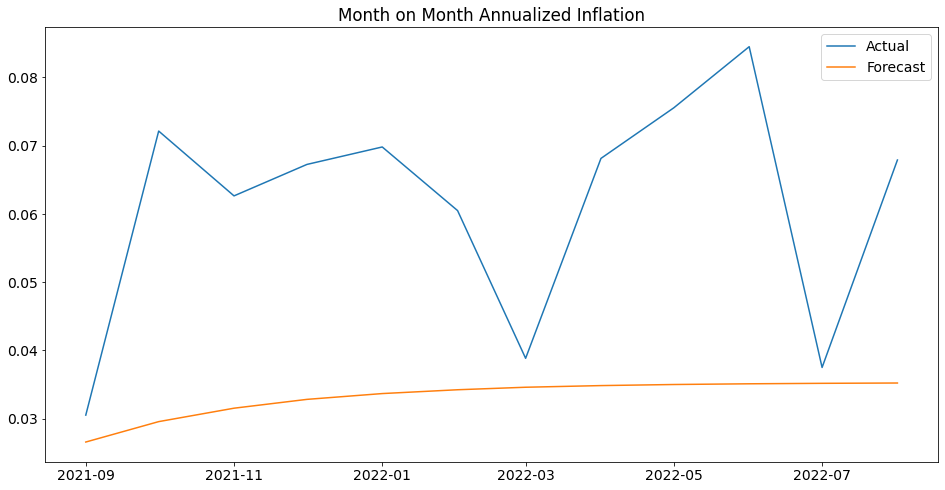

In [17]:
plt.plot(mom_test['cpi_mom'],label='Actual')
plt.plot(mom_test['predicted_mean'],label='Forecast')
plt.title('Month on Month Annualized Inflation')
plt.legend()

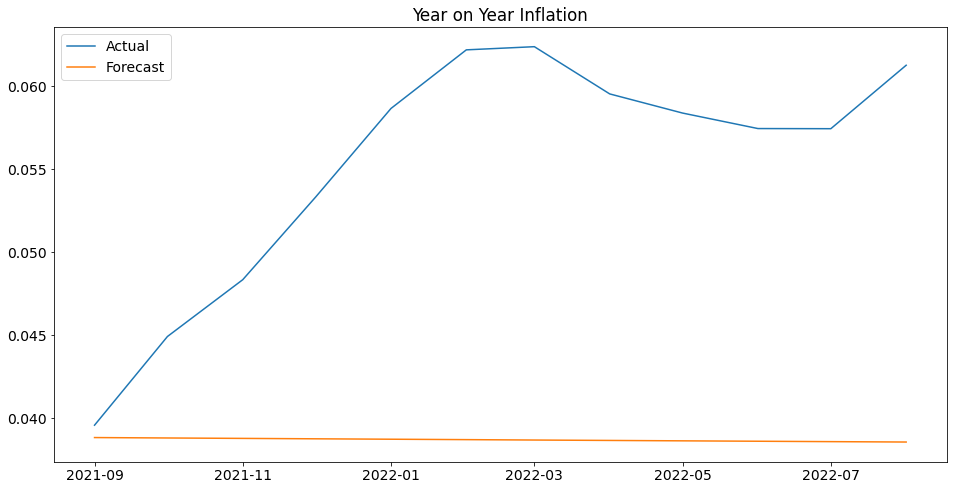

In [18]:
plt.plot(yoy_test['cpi_yoy'],label='Actual')
plt.plot(yoy_test['predicted_mean'],label='Forecast')
plt.title('Year on Year Inflation')
plt.legend()

## ARMA(1,1) In State Space Form

In [19]:
mom_model=SARIMAX(mom_train, trend='c',order=(1,0,1)).fit()
yoy_model=SARIMAX(yoy_train, trend='c',order=(1,0,1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
mom_fit=pd.DataFrame(mom_model.predict()).reset_index()
yoy_fit=pd.DataFrame(yoy_model.predict()).reset_index()

train_mom_fitted=pd.concat([mom_train.reset_index(), mom_fit], axis=1)
train_mom_fitted.index= pd.to_datetime(mom_train.reset_index()['date'], format='%Y-%m-%d', errors='coerce')

train_yoy_fitted=pd.concat([yoy_train.reset_index(), yoy_fit], axis=1)
train_yoy_fitted.index= pd.to_datetime(yoy_train.reset_index()['date'], format='%Y-%m-%d', errors='coerce')

train_mom_fitted.drop(['date','index'],axis=1,inplace=True)
train_yoy_fitted.drop(['date','index'],axis=1,inplace=True)

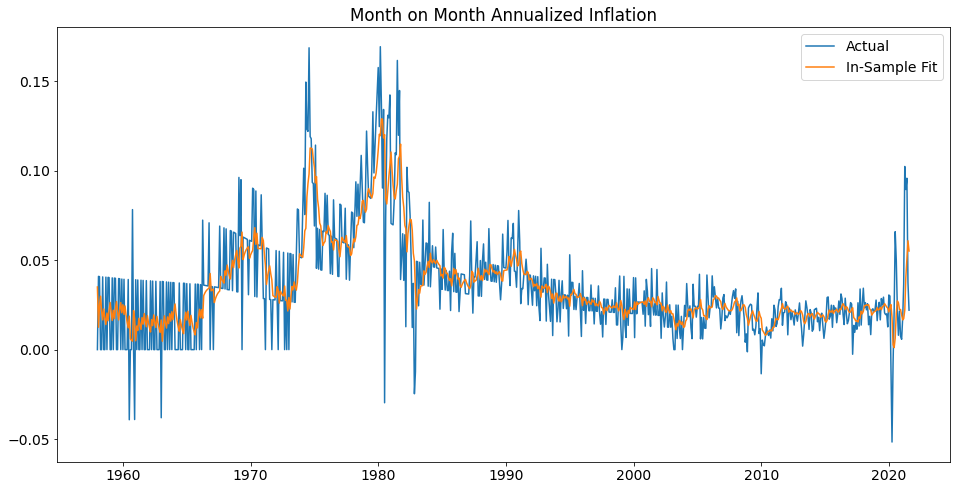

In [21]:
plt.plot(train_mom_fitted['cpi_mom'],label='Actual')
plt.plot(train_mom_fitted['predicted_mean'],label='In-Sample Fit')
plt.title('Month on Month Annualized Inflation')
plt.legend()

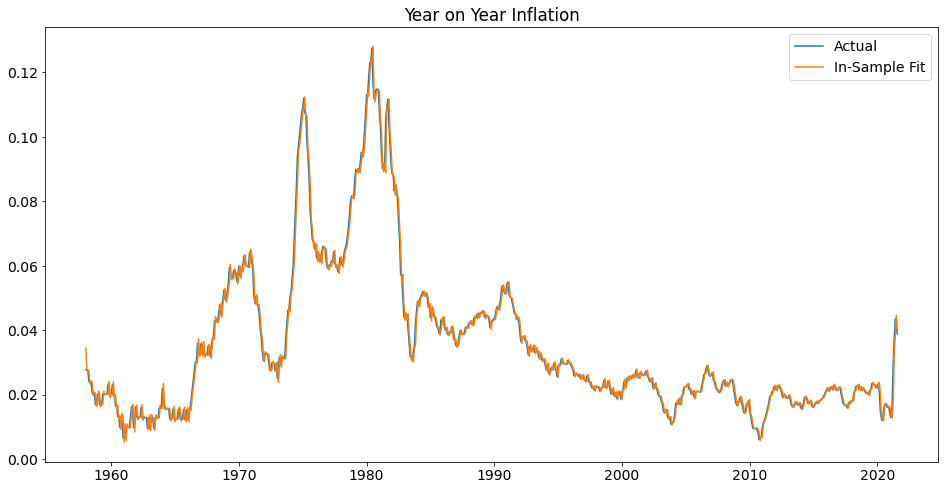

In [22]:
plt.plot(train_yoy_fitted['cpi_yoy'],label='Actual')
plt.plot(train_yoy_fitted['predicted_mean'],label='In-Sample Fit')
plt.title('Year on Year Inflation')
plt.legend()

In [23]:
mom_forecasts=mom_model.forecast(12)
mom_forecasts.index=pd.to_datetime(mom_test.reset_index()['date'])

yoy_forecasts=yoy_model.forecast(12)
yoy_forecasts.index=pd.to_datetime(yoy_test.reset_index()['date'])

mom_test =pd.concat([mom_test, mom_forecasts], axis=1)
yoy_test =pd.concat([yoy_test, yoy_forecasts], axis=1)

In [24]:
mom_test.columns=['cpi_mom','AR1_POOS','ARMA11_POOS']
yoy_test.columns=['cpi_yoy','AR1_POOS','ARMA11_POOS']


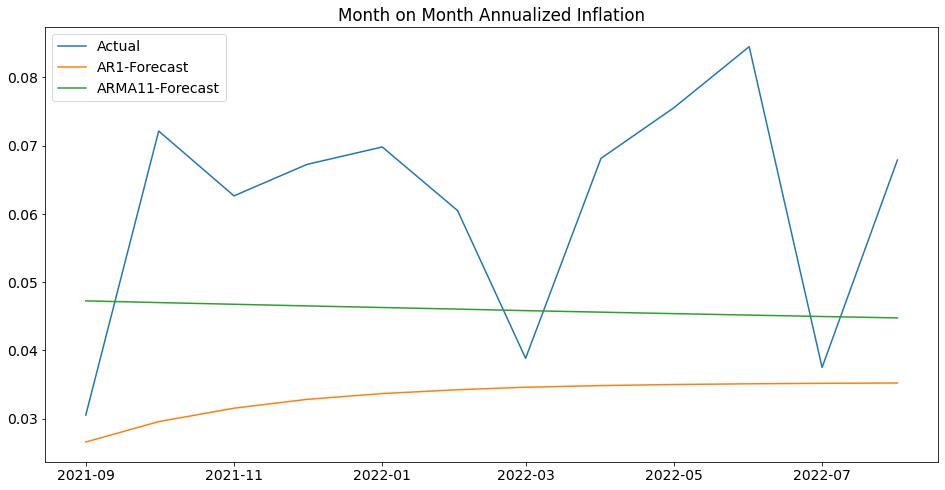

In [25]:
plt.plot(mom_test['cpi_mom'],label='Actual')
plt.plot(mom_test['AR1_POOS'],label='AR1-Forecast')
plt.plot(mom_test['ARMA11_POOS'],label='ARMA11-Forecast')
plt.title('Month on Month Annualized Inflation')
plt.legend()

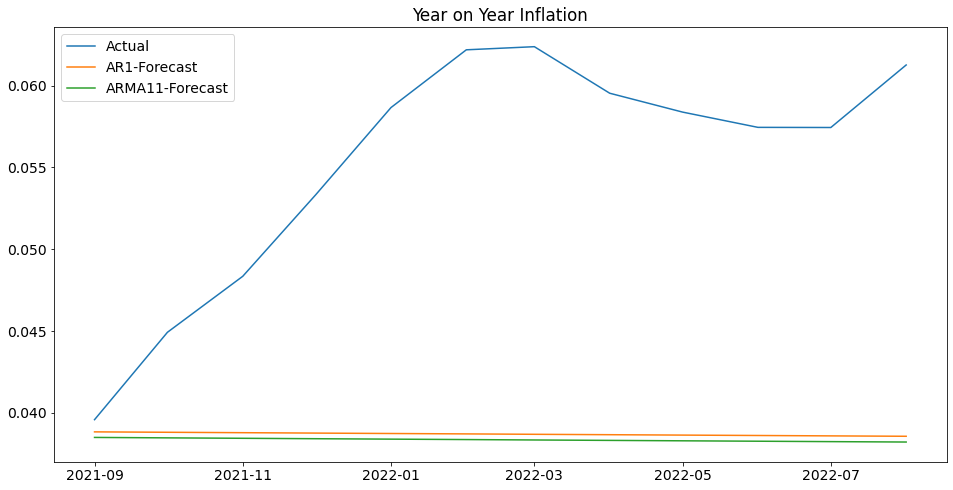

In [26]:
plt.plot(yoy_test['cpi_yoy'],label='Actual')
plt.plot(yoy_test['AR1_POOS'],label='AR1-Forecast')
plt.plot(yoy_test['ARMA11_POOS'],label='ARMA11-Forecast')
plt.title('Year on Year Inflation')
plt.legend()

In [27]:
mom_full=df.iloc[:,1]
yoy_full=df.iloc[:,2]

In [28]:
mom_model=SARIMAX(mom_full, trend='c',order=(1,0,1)).fit()
yoy_model=SARIMAX(yoy_full, trend='c',order=(1,0,1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [29]:
mom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                cpi_mom   No. Observations:                  776
Model:               SARIMAX(1, 0, 1)   Log Likelihood                1946.382
Date:                Thu, 13 Oct 2022   AIC                          -3884.765
Time:                        15:28:09   BIC                          -3866.148
Sample:                    01-01-1958   HQIC                         -3877.603
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      2.297      0.022       0.000       0.001
ar.L1          0.9803      0.006    166.077      0.000       0.969       0.992
ma.L1         -0.7555      0.019    -40.571      0.000      -0.792      -0.719
sigma2         0.0004   1.13e-05     34.160      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):              1135.99
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
yoy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                cpi_yoy   No. Observations:                  776
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3578.443
Date:                Thu, 13 Oct 2022   AIC                          -7148.885
Time:                        15:28:09   BIC                          -7130.268
Sample:                    01-01-1958   HQIC                         -7141.723
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.123      0.261      -0.000       0.001
ar.L1          0.9942      0.003    319.896      0.000       0.988       1.000
ma.L1          0.2352      0.026      8.899      0.000       0.183       0.287
sigma2      5.733e-06   1.54e-07     37.141      0.000    5.43e-06    6.04e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               895.92
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
mom_oos=mom_model.forecast(17)
yoy_oos=mom_model.forecast(17)

In [32]:
mom_full=pd.concat([mom_full,mom_oos],axis=1)
yoy_full=pd.concat([yoy_full,yoy_oos],axis=1)



In [33]:
mom_full.columns=['Actual','Forecat']
yoy_full.columns=['Actual','Forecat']

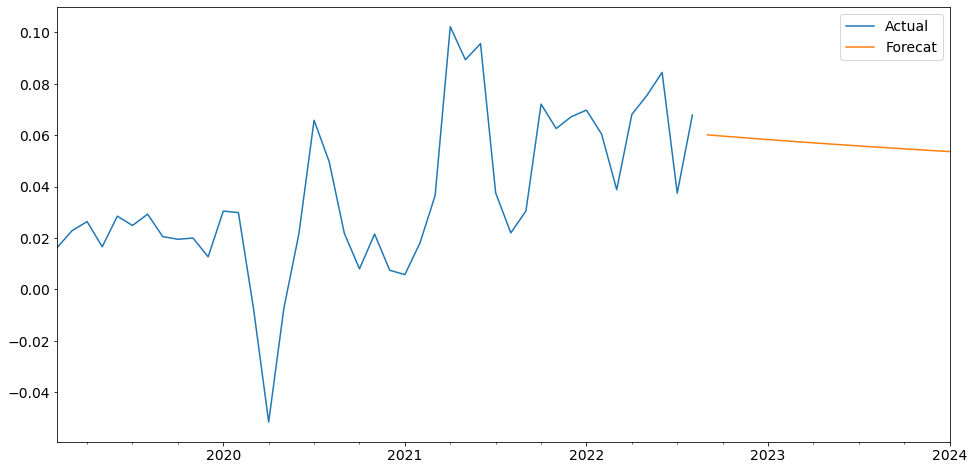

In [34]:
mom_full.iloc[-60:,:].plot()

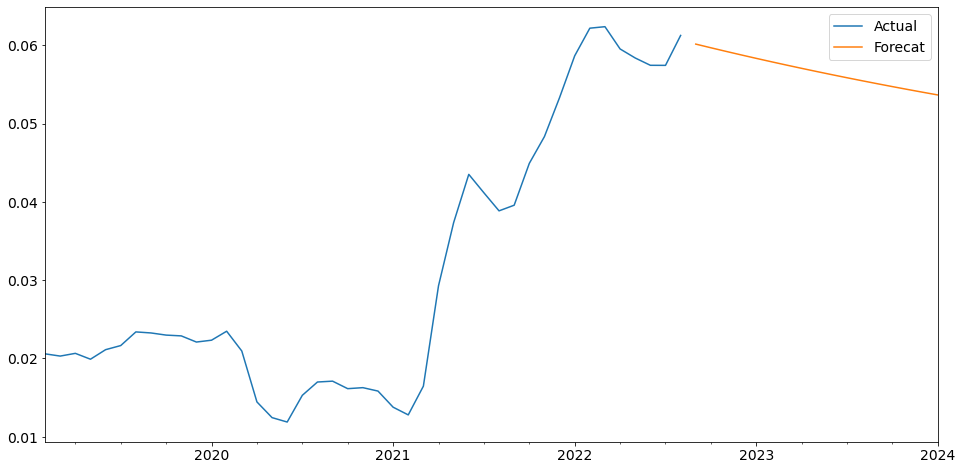

In [35]:
yoy_full.iloc[-60:,:].plot()

# Markov Switching Models

In [36]:
mom_full=df.iloc[:,1]
yoy_full=df.iloc[:,2]

## 3 Regimes No Lag

In [37]:
mom_ms_k3l0 = sm.tsa.MarkovRegression(mom_full,k_regimes=3).fit()
mom_ms_k3l0.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                cpi_mom   No. Observations:                  776
Model:               MarkovRegression   Log Likelihood                1977.204
Date:                Thu, 13 Oct 2022   AIC                          -3934.407
Time:                        15:28:15   BIC                          -3887.866
Sample:                    01-01-1958   HQIC                         -3916.503
                         - 08-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0498      0.001     33.642      0.000       0.047       0.053
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      0.001     23.682      0.000       0.019       0.022
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1078      0.003     32.680      0.000       0.101       0.114
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.65e-05     18.092      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9599      0.019     49.437      0.000       0.922       0.998
p[1->0]        0.0090      0.006      1.575      0.115      -0.002       0.020
p[2->0]        0.0949      0.068      1.392      0.164      -0.039       0.229
p[0->1]        0.0142      0.009      1.524      0.128      -0.004       0.033
p[1->1]        0.9909      0.005    181.748      0.000       0.980       1.002
p[2->1]        0.0143      0.037      0.385      0.700      -0.058       0.087
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

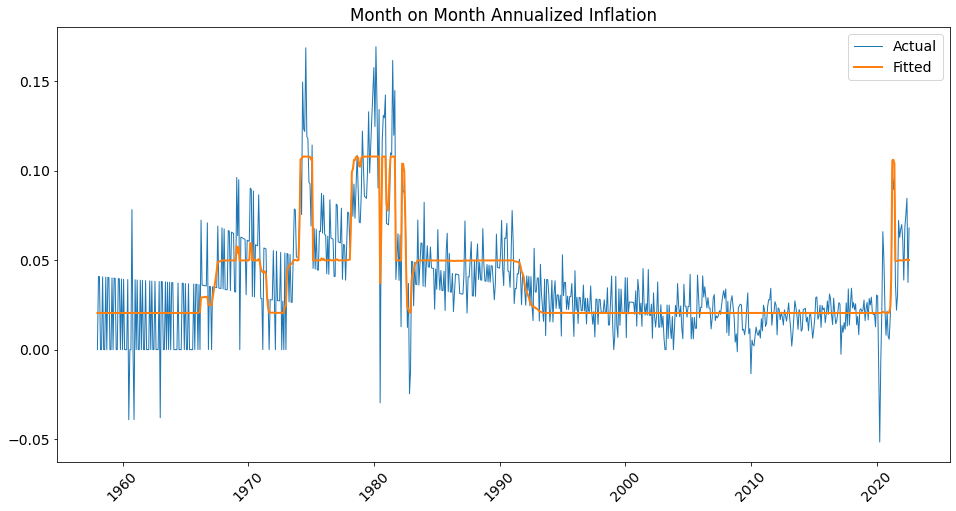

In [38]:
plt.plot(mom_full, lw=1)
plt.plot(mom_ms_k3l0.fittedvalues,lw=2)
plt.xticks(rotation=45)
plt.title('Month on Month Annualized Inflation')
plt.legend(('Actual','Fitted'))

In [39]:
# yoy_ms_k3l0 = sm.tsa.MarkovRegression(yoy_full,k_regimes=3).fit(maxiter=5000)
# yoy_ms_k3l0.summary()
yoy_ms_k2l0 = sm.tsa.MarkovRegression(yoy_full,k_regimes=2).fit(maxiter=5000)
yoy_ms_k2l0.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                cpi_yoy   No. Observations:                  776
Model:               MarkovRegression   Log Likelihood                2213.746
Date:                Thu, 13 Oct 2022   AIC                          -4417.492
Time:                        15:28:17   BIC                          -4394.221
Sample:                    01-01-1958   HQIC                         -4408.540
                         - 08-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0264      0.001     47.641      0.000       0.025       0.027
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0772      0.001     59.313      0.000       0.075       0.080
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   9.38e-06     19.619      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9956      0.003    387.814      0.000       0.991       1.001
p[1->0]        0.0160      0.010      1.552      0.121      -0.004       0.036
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

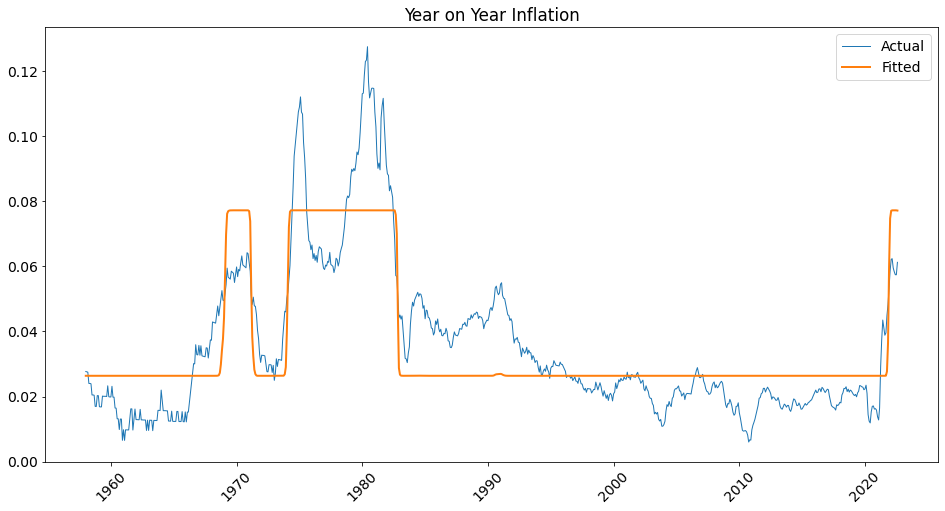

In [40]:
plt.plot(yoy_full, lw=1)
plt.plot(yoy_ms_k2l0.fittedvalues,lw=2)
plt.xticks(rotation=45)
plt.title('Year on Year Inflation')
plt.legend(('Actual','Fitted'))

## 2 Regimes 1 Lag

In [41]:
mom_ms_k2l1 = sm.tsa.MarkovAutoregression(mom_full,k_regimes=2,order=1,switching_ar=True).fit()
mom_ms_k2l1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  cpi_mom   No. Observations:                  775
Model:             MarkovAutoregression   Log Likelihood                1948.116
Date:                  Thu, 13 Oct 2022   AIC                          -3882.232
Time:                          15:28:19   BIC                          -3849.662
Sample:                      01-01-1958   HQIC                         -3869.701
                           - 08-01-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0208      0.001     23.629      0.000       0.019       0.023
ar.L1         -0.0377      0.057     -0.664      0.506      -0.149       0.074
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.004     16.408      0.000       0.057       0.073
ar.L1          0.7237      0.039     18.347      0.000       0.646       0.801
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.85e-05     17.937      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9844      0.006    153.649      0.000       0.972       0.997
p[1->0]        0.0258      0.011      2.368      0.018       0.004       0.047
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [42]:
yoy_ms_k2l1 = sm.tsa.MarkovAutoregression(yoy_full,k_regimes=2,order=1,switching_ar=True).fit()
yoy_ms_k2l1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  cpi_yoy   No. Observations:                  775
Model:             MarkovAutoregression   Log Likelihood                3612.262
Date:                  Thu, 13 Oct 2022   AIC                          -7210.523
Time:                          15:28:20   BIC                          -7177.953
Sample:                      01-01-1958   HQIC                         -7197.993
                           - 08-01-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0600      0.003     23.422      0.000       0.055       0.065
ar.L1          0.8069      0.014     56.099      0.000       0.779       0.835
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0570      0.003     19.897      0.000       0.051       0.063
ar.L1          0.9995      0.003    399.402      0.000       0.995       1.004
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.526e-06   2.49e-07     18.159      0.000    4.04e-06    5.02e-06
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7798      0.088      8.831      0.000       0.607       0.953
p[1->0]        0.0151      0.005      2.933      0.003       0.005       0.025
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

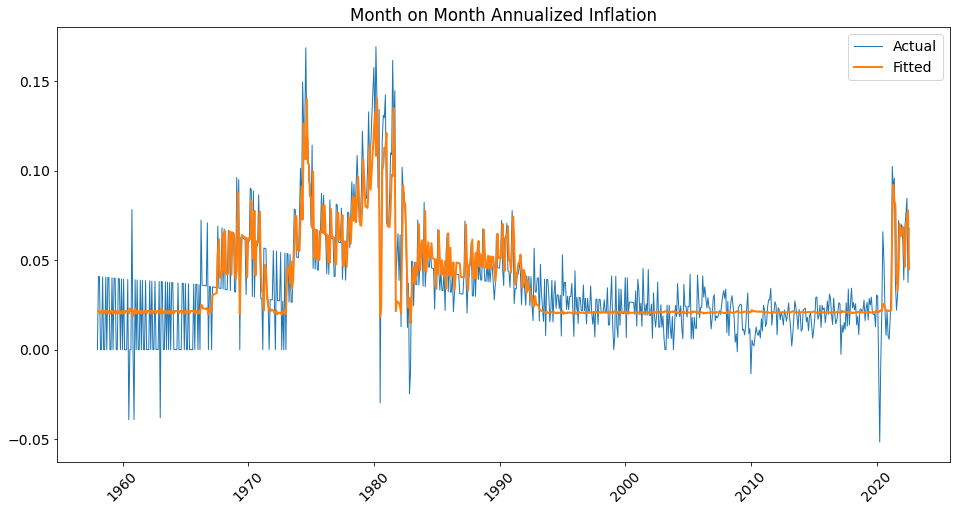

In [43]:
plt.plot(mom_full, lw=1)
plt.plot(mom_ms_k2l1.fittedvalues,lw=2)
plt.xticks(rotation=45)
plt.title('Month on Month Annualized Inflation')
plt.legend(('Actual','Fitted'))

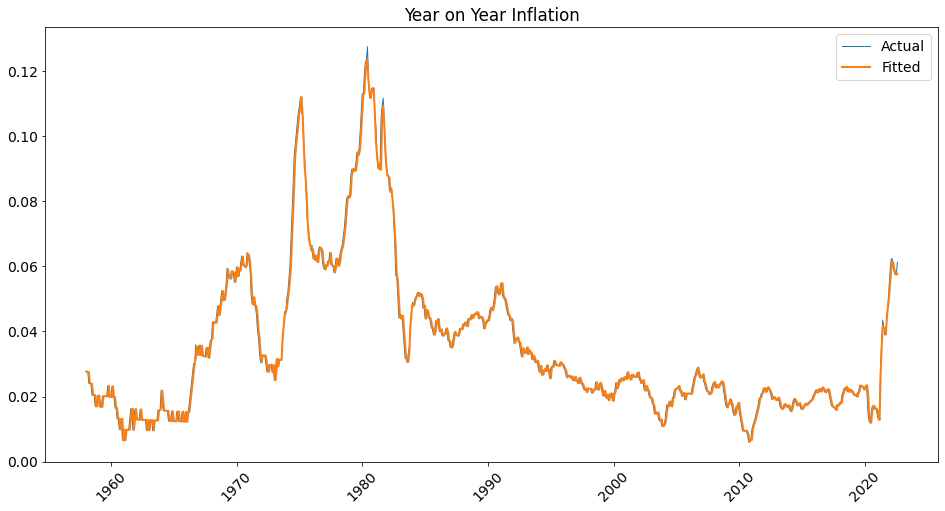

In [44]:
plt.plot(yoy_full, lw=1)
plt.plot(yoy_ms_k2l1.fittedvalues,lw=2)
plt.xticks(rotation=45)
plt.title('Year on Year Inflation')
plt.legend(('Actual','Fitted'))

Text(0.5, 1.0, 'Month on Month Inflation- Marginal Probabilities- Regime 1')

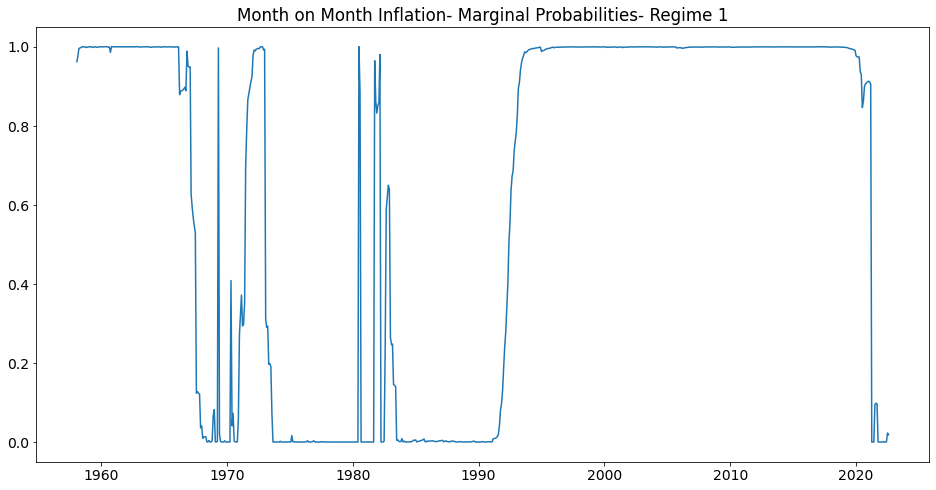

In [45]:
plt.plot(mom_ms_k2l1.smoothed_marginal_probabilities[0])
plt.title('Month on Month Inflation- Marginal Probabilities- Regime 1')

Text(0.5, 1.0, 'Year on Year Inflation- Marginal Probabilities- Regime 1')

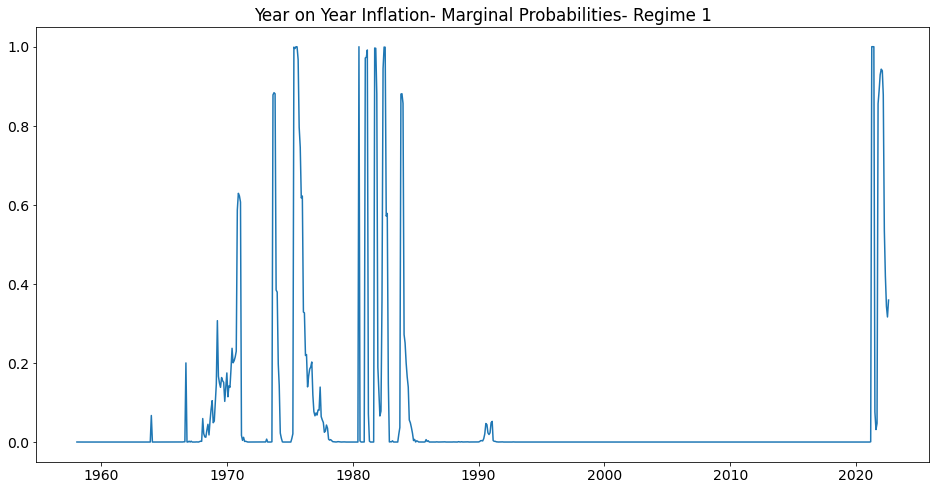

In [46]:
plt.plot(yoy_ms_k2l1.smoothed_marginal_probabilities[0])
plt.title('Year on Year Inflation- Marginal Probabilities- Regime 1')

## 3 Regimes 1 Lag

In [47]:
mom_ms_k3l1 = sm.tsa.MarkovAutoregression(mom_full,k_regimes=3,order=1,switching_ar=True).fit()
mom_ms_k3l1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  cpi_mom   No. Observations:                  775
Model:             MarkovAutoregression   Log Likelihood                1999.377
Date:                  Thu, 13 Oct 2022   AIC                          -3972.754
Time:                          15:28:25   BIC                          -3912.266
Sample:                      01-01-1958   HQIC                         -3949.482
                           - 08-01-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0198      0.001     30.953      0.000       0.019       0.021
ar.L1         -0.1743      0.053     -3.288      0.001      -0.278      -0.070
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0464      0.004     11.282      0.000       0.038       0.054
ar.L1          0.7655      0.045     16.886      0.000       0.677       0.854
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0790      0.005     16.541      0.000       0.070       0.088
ar.L1          0.9847      0.062     15.791      0.000       0.862       1.107
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.36e-05     15.829      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9859      0.007    151.326      0.000       0.973       0.999
p[1->0]        0.0002      0.021      0.009      0.993      -0.041       0.042
p[2->0]        0.0578      0.040      1.463      0.143      -0.020       0.135
p[0->1]        0.0009      0.003      0.312      0.755      -0.005       0.007
p[1->1]        0.7592      0.054     14.076      0.000       0.653       0.865
p[2->1]        0.5422      0.080      6.789      0.000       0.386       0.699
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [48]:
yoy_ms_k3l1 = sm.tsa.MarkovAutoregression(yoy_full,k_regimes=3,order=1,switching_ar=True).fit()
yoy_ms_k3l1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  cpi_yoy   No. Observations:                  775
Model:             MarkovAutoregression   Log Likelihood                3559.232
Date:                  Thu, 13 Oct 2022   AIC                          -7092.464
Time:                          15:28:28   BIC                          -7031.977
Sample:                      01-01-1958   HQIC                         -7069.193
                           - 08-01-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0286      0.053      0.537      0.591      -0.076       0.133
ar.L1          0.5716      1.760      0.325      0.745      -2.877       4.020
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0286      0.022      1.294      0.196      -0.015       0.072
ar.L1          0.7705      2.328      0.331      0.741      -3.792       5.333
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.022      1.889      0.059      -0.002       0.084
ar.L1          0.9959      0.004    271.451      0.000       0.989       1.003
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.887e-06   2.99e-07     19.671      0.000     5.3e-06    6.47e-06
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0010        nan        nan        nan         nan         nan
p[1->0]     1.548e-06      1.099   1.41e-06      1.000      -2.154       2.154
p[2->0]        0.0013      0.001      1.000      0.317      -0.001       0.004
p[0->1]        0.9990        nan        nan        nan         nan         nan
p[1->1]        0.0042      0.621      0.007      0.995      -1.213       1.221
p[2->1]     6.565e-07      0.016   4.23e-05      1.000      -0.030       0.030
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

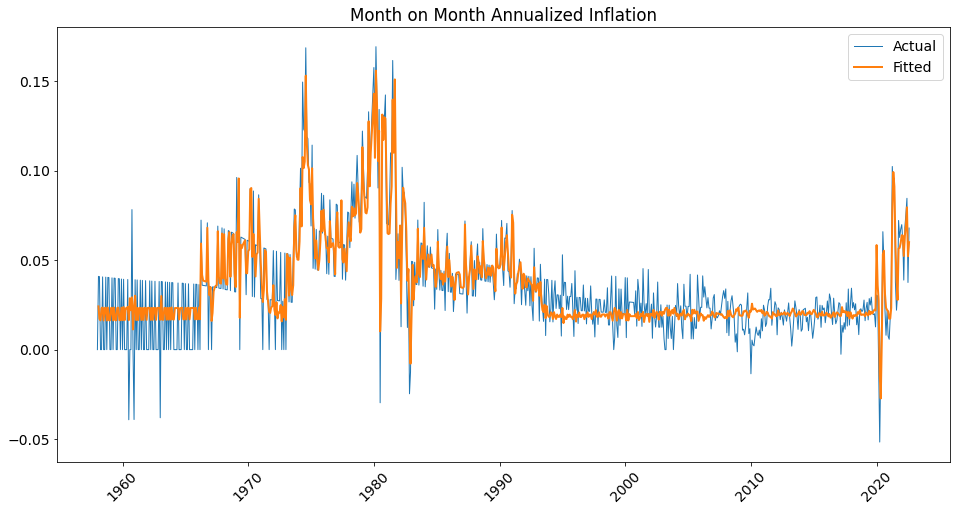

In [49]:
plt.plot(mom_full, lw=1)
plt.plot(mom_ms_k3l1.fittedvalues,lw=2)
plt.xticks(rotation=45)
plt.title('Month on Month Annualized Inflation')
plt.legend(('Actual','Fitted'))

Text(0.5, 1.0, 'Month on Month Inflation- Marginal Probabilities- Regime 1')

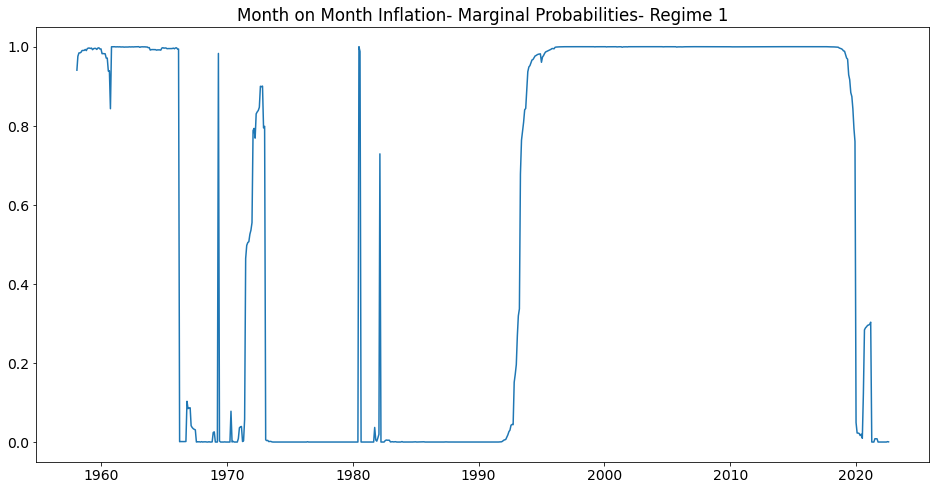

In [50]:
plt.plot(mom_ms_k3l1.smoothed_marginal_probabilities[0])
plt.title('Month on Month Inflation- Marginal Probabilities- Regime 1')

Text(0.5, 1.0, 'Month on Month Inflation- Marginal Probabilities- Regime 2')

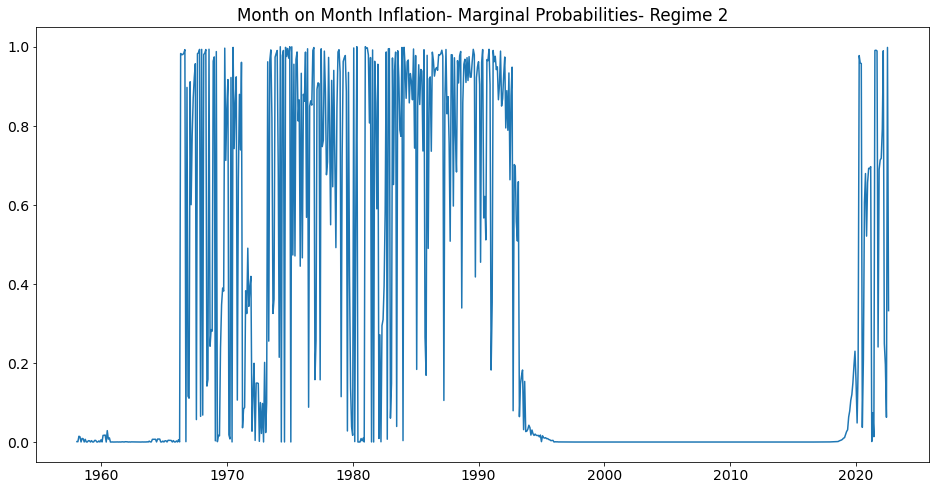

In [51]:
plt.plot(mom_ms_k3l1.smoothed_marginal_probabilities[1])
plt.title('Month on Month Inflation- Marginal Probabilities- Regime 2')

Text(0.5, 1.0, 'Month on Month Inflation- Marginal Probabilities- Regime 3')

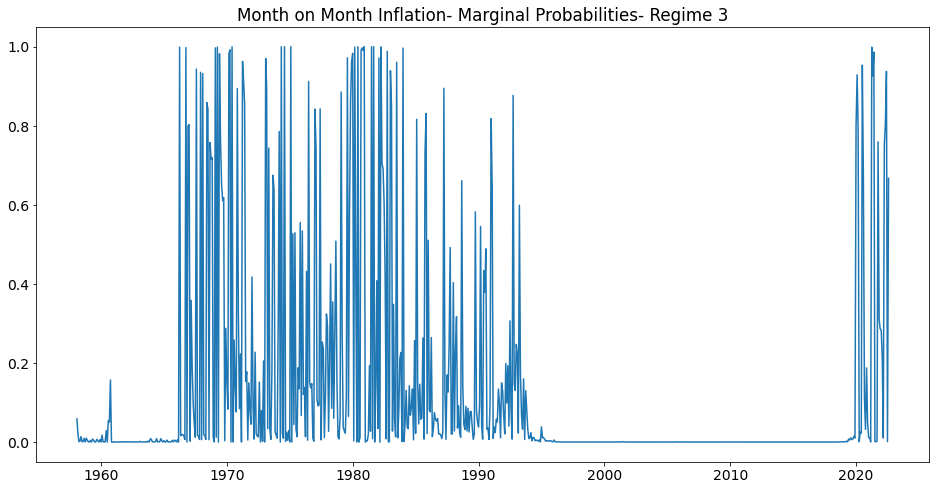

In [52]:
plt.plot(mom_ms_k3l1.smoothed_marginal_probabilities[2])
plt.title('Month on Month Inflation- Marginal Probabilities- Regime 3')